# Sensors and Signal Analysis 2024
Author: Nuno Azevedo Silva

## Week II - Signal Analysis 
Notebooks for classes

## 1. Static Response

The static response of a sensor refers to its behavior under steady-state conditions, where the quantity being measured does not change over time. Knowing the applied stimulus $s$ (normally well-known standards), one can determine the transfer function 

$$E = F(s)$$

of the sensor and deploy a calibration model by curve fitting procedures,

$$ s_m = C(E)$$

to obtain a measure for $s_m$.

For this activity we'll have the measured signals of 3 sensors A, B and C for a set of 20 stimuli. Each signal corresponds to the measured steady-state response to a given stimuli during 10 seconds.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Gen Data

In [ ]:
def sensorA(stimulus):
    return (stimulus/100)

def sensorB(stimulus):
    return np.tanh(stimulus/40)

def sensorC(stimulus):
    return 0.2 + 0.8/(1 + np.exp(-(stimulus-60)/10))

stimulus = np.arange(0,100,5)

transfer_A = sensorA(stimulus)
transfer_B = sensorB(stimulus)
transfer_C = sensorC(stimulus)

fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.plot(stimulus, transfer_A, ls='--',marker='o')
ax.plot(stimulus, transfer_B, ls='--',marker='o')
ax.plot(stimulus, transfer_C, ls='--',marker='o')
ax.set_xlabel('Stimulus (arb.units)')
ax.set_ylabel('Signal (arb.units)')

data_sensorA = []
data_sensorB = []
data_sensorC = []
time = np.linspace(0,10,1000)
rng = np.random.default_rng()
for s in stimulus:
    noise=0.2
    data_sensorA.append( sensorA(s) + noise*0.3*np.random.random(len(time)))
    data_sensorB.append( sensorB(s) + noise*np.random.normal(loc=0,scale=0.1,size=len(time)))
    shape_param = 4
    scale_param = 0.5
    poisson_samples = np.random.gamma(shape_param, scale_param, size=len(time))
    max_value = np.max(poisson_samples)
    data_sensorC.append( sensorC(s) + noise*(poisson_samples / max_value) * 0.5)

data_sensorA = np.array(data_sensorA)
data_sensorB = np.array(data_sensorB)
data_sensorC = np.array(data_sensorC)


In [ ]:
np.savetxt('time.txt',time)
np.savetxt('stimulus.txt',stimulus)
np.savetxt('data_sensorA.txt',data_sensorA)
np.savetxt('data_sensorB.txt',data_sensorB)
np.savetxt('data_sensorC.txt',data_sensorC)

In [2]:
## Load data

time = np.loadtxt('time.txt')
stimulus = np.loadtxt('stimulus.txt')
data_sensorA = np.loadtxt('data_sensorA.txt')
data_sensorB = np.loadtxt('data_sensorB.txt')
data_sensorC = np.loadtxt('data_sensorC.txt')

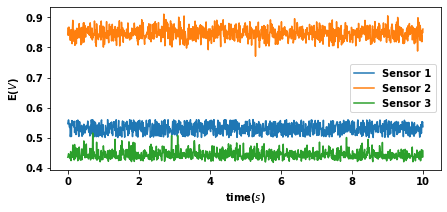

In [3]:
time = np.linspace(0,10,1000) ## Sampling rate 100Hz

##index of stimulus to plot
index_s=10

fig,ax = plt.subplots(1,1,figsize=[7,3])
ax.plot(time, data_sensorA[index_s], label=f'Sensor 1')
ax.plot(time, data_sensorB[index_s], label=f'Sensor 2')
ax.plot(time, data_sensorC[index_s], label=f'Sensor 3')
ax.set_xlabel(r'time($s$)')
ax.set_ylabel(r'E($V$)')
ax.legend()

## 1.2 and 1.3 Central Tendency, uncertainty and probability

So what information will you extract from this?

Having multiple measures for the same stimulus we have an opportunity for applying statistical methods and extract meaningul information in the most correct mathematical manner. Looking at the probability distribution, mean ($\mu$), median and standard deviation is a good starting point.

***Exercise:*** Utilizing the hist function of matplotlib plot an histogram for the distribution of the measured signal for a given stimulus for each sensor. In the same graph represent the mean and median. What should you utilize?

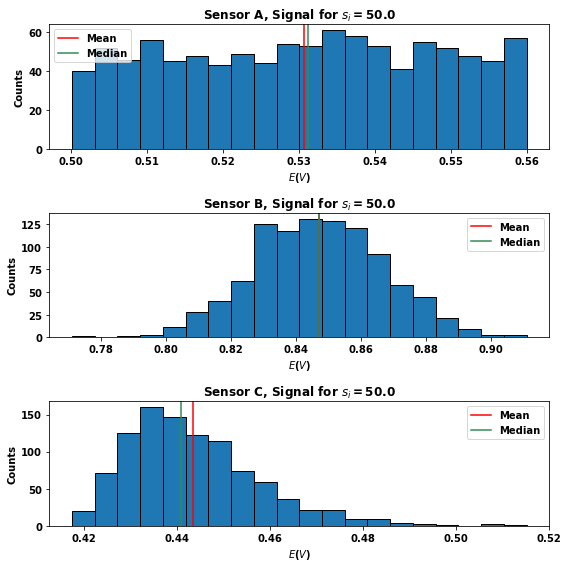

In [4]:
#### hint: you may utilize axvline to plot a vertical line

fig,ax = plt.subplots(3,1,figsize=[8,8])

sensor_name_list = ['Sensor A', 'Sensor B', 'Sensor C']

for i,data in enumerate([data_sensorA[index_s], data_sensorB[index_s], data_sensorC[index_s]]):

    ax[i].set_title(sensor_name_list[i] + r', Signal for $s_i=${}'.format(stimulus[index_s]))
    ax[i].hist(data,bins=20,ec='k')
    ax[i].axvline(np.mean(data),label='Mean',color='r')
    ax[i].axvline(np.median(data),label='Median',color='seagreen')

    ax[i].set_xlabel(r'$E(V)$')
    ax[i].set_ylabel(r'Counts')
    ax[i].legend()


fig.tight_layout()

Normally if the distribution of values is a gaussian / normal distribution, a good estimate for the uncertainty is the standard deviation. Yet, we see this is only the case for the signal 2, whereas signal 1 follows a more uniform distribution. The problem is that the standard deviation is defined as

$$\sigma = \sqrt{ \frac{\sum (E_i - \mu)^2}{N-1} }$$

and while the interval $[\mu - \sigma, \mu +\sigma]$ contains 68.3\% for the, this is only valid for the gaussian distribution.


***Exercise:*** Taking sensor A, B, and C data for the same stimuli, prove this by plotting the standard deviation and interquartile range in the same graphs for the various distributions. An interesting trick for data analysis is to compute the kernel density estimator.

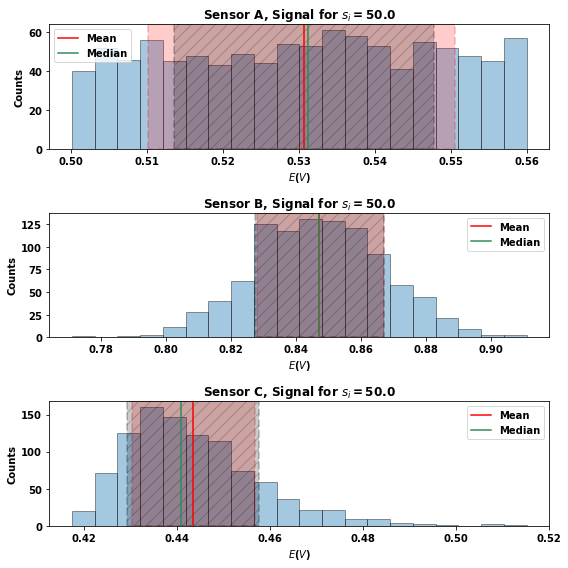

In [5]:
#### hint: use numpy percentile function, you may utilize axvspan to fill between two vertical lines

fig,ax = plt.subplots(3,1,figsize=[8,8])

sensor_name_list = ['Sensor A', 'Sensor B', 'Sensor C']

for i,data in enumerate([data_sensorA[index_s], data_sensorB[index_s], data_sensorC[index_s]]):

    ax[i].set_title(sensor_name_list[i] + r', Signal for $s_i=${}'.format(stimulus[index_s]))
    ax[i].hist(data,bins=20,ec='k',alpha=0.4)
    ax[i].axvline(np.mean(data),label='Mean',color='r')
    ax[i].axvline(np.median(data),label='Median',color='seagreen')

    ####from percentiles
    p0 = np.percentile(data, 50-68.3/2) 
    p1 = np.percentile(data, 50+68.3/2)
    mean = np.mean(data)
    std = np.std(data)
    ax[i].axvspan(p0,p1, color='r',lw=2,ls='--',alpha=0.2)
    ax[i].axvspan(mean-std,mean+std, color='k',lw=2,ls='--',alpha=0.2,hatch='//')
    

    ax[i].set_xlabel(r'$E(V)$')
    ax[i].set_ylabel(r'Counts')
    ax[i].legend()


fig.tight_layout()

For Sensor A it is a good approximation to consider the standard deviation, but for sensor B a better estimate of the uncertainty maybe to utilize the concept of quantiles, i.e. the cut points that divide the probability distribution. 

So far we are assuming that we only have type A uncertainties. In the case we had type B one would apply the standard formula
$$u = \sqrt{u_A^2 + u_B^2}$$

***Exercise*** Consider a fixed value for u_B (e.g. 0.02) and get an estimate for each sensor, for each measurement $\{s_i, E_i\}$. For the present case consider the 95\% confidence interval: for that, you take $2\sigma$ for sensor A and 2.5\% - 97.5\% percentile for sensor B.

In [6]:
###hint: for cycle to create an output signal and uncertainty for each stimulus for each sensor


###########################################
#################SENSOR A##################

output_signalA = []
uncertainty_signalA = []
u_B=0.02

for i,s in enumerate(stimulus):
    data = data_sensorA[i]

    ##output signal
    mean = np.mean(data)
    output_signalA.append(mean)

    ##uncertainty
    p0 = np.percentile(data, 2.5) 
    p1 = np.percentile(data, 97.5)

    u_A = np.max([np.abs(mean-p0),np.abs(mean-p1)])

    u= np.sqrt(u_A**2 + u_B**2) 
    
    uncertainty_signalA.append(u)

output_signalA = np.array(output_signalA)
uncertainty_signalA = np.array(uncertainty_signalA)

###########################################
#################SENSOR B##################

output_signalB = []
uncertainty_signalB = []
u_B=0.02

for i,s in enumerate(stimulus):
    data = data_sensorB[i]
    
    ##output signal
    mean = np.mean(data)
    output_signalB.append(mean)

    ##uncertainty

    u_A = 2*np.std(data)
    u= np.sqrt(u_A**2 + u_B**2) 
    
    uncertainty_signalB.append(u)

output_signalB = np.array(output_signalB)
uncertainty_signalB = np.array(uncertainty_signalB)

###########################################
#################SENSOR C##################

output_signalC = []
uncertainty_signalC = []
u_B=0.02

for i,s in enumerate(stimulus):
    data = data_sensorC[i]
    
    ##output signal
    mean = np.median(data)
    output_signalC.append(mean)

    ##uncertainty
    p0 = np.percentile(data, 2.5) 
    p1 = np.percentile(data, 97.5)
    u_A = np.max([np.abs(mean-p0),np.abs(mean-p1)])
    u= np.sqrt(u_A**2 + u_B**2) 
    
    uncertainty_signalC.append(u)

output_signalC = np.array(output_signalC)
uncertainty_signalC = np.array(uncertainty_signalC)


## 1.4. Signal-to-noise Ratio

Having an estimate for uncertainty is an opportunity for estimating the Signal to Noise Ratio - SNR. One of the definitions of the SNR is to consider the mean and estimate for the standard deviation
For Powers
$$SNR = \frac{P_{signal}}{P_{noise}}$$
or in dB
$$SNR = 10 \log_{10} \frac{P_{signal}}{P_{noise}}$$
for amplitudes
$$SNR = \frac{A^{2}_{signal}}{A^{2}_{noise}}$$
or in dB
$$SNR = 20 \log_{10} \frac{A_{signal}}{A_{noise}}$$

***Exercise*** Estimate the SNR for each sensor for two distinct stimulus. You may utilize the uncertainty as noise level as a ratio and in dB. What do you conclude considering distinct stimulus?

In [7]:
print('Sensor A\n', 20 * np.log10( output_signalA / uncertainty_signalA ))
print('Sensor B\n', 20 * np.log10( output_signalB / uncertainty_signalB ))
print('Sensor C\n', 20 * np.log10( output_signalC / uncertainty_signalC ))

Sensor A
 [-1.31423216  7.25050246 11.50680652 14.2176852  16.4152149  18.16172118
 19.43843148 20.71671384 21.77247631 22.84546497 23.63642166 24.22378405
 25.02036135 25.73649066 26.31805617 27.00872518 27.46704011 27.95628965
 28.52021622 28.88664867]
Sensor B
 [-37.7483107    8.71824621  14.94876182  17.86449071  20.3200727
  21.76744965  23.12437188  23.73948374  24.66399299  25.15137095
  25.57348297  26.06596955  26.1224799   26.21412862  26.10955004
  26.84155007  26.83974079  26.56957582  26.78616535  26.78454078]
Sensor C
 [16.32620052 14.21950851 15.3442911  14.43706541 14.92028656 15.57331417
 15.88823064 15.61469106 17.38757898 19.75266991 20.57288138 22.29673383
 23.25277362 24.16658986 24.37004827 26.82879443 25.86063326 27.49839501
 26.75448759 28.62031986]


## 1.5. Transfer Function and calibration model

Having the output signal associated to known stimuli (also called standards), we have the necessary conditions to compute the transfer function for the three sensors.

***Exercise:*** Plot the transfer function for each sensor. Utilizing a spline interpolation. Analyze each of the sensors taking into consideration the characteristics we have defined during week 1, namely:
- Span, Full-scale Output, Dynamic Range, and Deadband;
- Linearity and saturation;
- Sensitivity, by computing a numerical derivative.

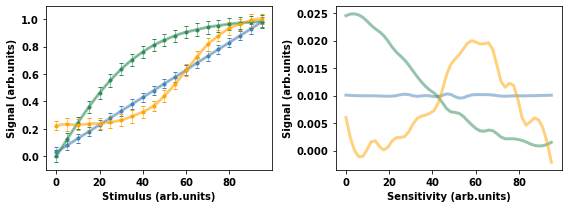

In [8]:
###Hint: Plot using errorbar, interpolate using scipy CubicSpline, parameter nu to compute derivative

from scipy.interpolate import CubicSpline
fig, axs = plt.subplots(1,2,figsize=[8,3])

ax = axs[0]
ax2 = axs[1]
stimulus2 = np.linspace(np.min(stimulus),np.max(stimulus),50)
transferA = CubicSpline(stimulus, output_signalA)
colorA='steelblue'
ax.errorbar(stimulus, output_signalA, yerr = uncertainty_signalA, color=colorA,capsize=2,ls='--',lw=0.5,ms=3,marker='o')
ax.plot(stimulus2,transferA(stimulus2),color=colorA,ls='-',lw=3,alpha=0.5)
ax2.plot(stimulus2,transferA(stimulus2,nu=1),color=colorA,ls='-',lw=3,alpha=0.5)

transferB = CubicSpline(stimulus, output_signalB)
colorB='seagreen'
ax.errorbar(stimulus, output_signalB, yerr = uncertainty_signalB, color=colorB,capsize=2,ls='--',lw=0.5,ms=3,marker='o')
ax.plot(stimulus2,transferB(stimulus2),color=colorB,ls='-',lw=3,alpha=0.5)
ax2.plot(stimulus2,transferB(stimulus2,nu=1),color=colorB,ls='-',lw=3,alpha=0.5)

transferC = CubicSpline(stimulus, output_signalC)
colorC='orange'
ax.errorbar(stimulus, output_signalC, yerr = uncertainty_signalC, color=colorC,capsize=2,ls='--',lw=0.5,ms=3,marker='o')
ax.plot(stimulus2,transferC(stimulus2),color=colorC,ls='-',lw=3,alpha=0.5)
ax2.plot(stimulus2,transferC(stimulus2,nu=1),color=colorC,ls='-',lw=3,alpha=0.5)

ax.set_xlabel('Stimulus (arb.units)')
ax.set_ylabel('Signal (arb.units)')

ax2.set_xlabel('Sensitivity (arb.units)')
ax2.set_ylabel('Signal (arb.units)')

fig.tight_layout()

***Exercise:*** Compute a calibration model for each sensor, providing the numerical expression and accuracy.

Maximum U_measure 4.505956151872035
Maximum distance C-T 0.5397487963762445


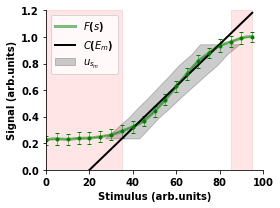

In [9]:
##Hint: utilize scipy curve_fit or the llmfit library for regression
from scipy.optimize import curve_fit

lower_limit = 35
lower_limit_index = np.argmin(np.abs(stimulus-lower_limit))

upper_limit = 85
upper_limit_index = np.argmin(np.abs(stimulus-upper_limit))

fig, ax = plt.subplots(1,1,figsize=[4,3])

def model(x, m, b):
    return m * x + b

parametersC, pcov_C = curve_fit(model, 
                stimulus[lower_limit_index:upper_limit_index], 
                output_signalC[lower_limit_index:upper_limit_index],
                sigma=uncertainty_signalC[lower_limit_index:upper_limit_index])
 

colorC='green'
ax.errorbar(stimulus, output_signalC, yerr = uncertainty_signalC, color=colorC,capsize=2,ls='--',lw=0.5,ms=3,marker='o')
ax.plot(stimulus2,transferC(stimulus2),color=colorC,ls='-',lw=3,alpha=0.5,label=r'$F(s)$')

ax.plot(stimulus2, model(stimulus2,parametersC[0],parametersC[1]),color='k',ls='-',lw=2,label=r'$C(E_m)$')

ax.axvspan(0,stimulus[lower_limit_index],color='red',alpha=0.1)
ax.axvspan(stimulus[upper_limit_index],np.max(stimulus),color='red',alpha=0.1)

###uncertainty in the estimate

pstd_C = np.sqrt(np.diag(pcov_C))
uncertainty_measure_C = np.sqrt((uncertainty_signalC[lower_limit_index:upper_limit_index] * 1/parametersC[0])**2+ 
                            (pstd_C[0]*output_signalC[lower_limit_index:upper_limit_index]/parametersC[0]**2)**2 + 
                            (pstd_C[1]/parametersC[0])**2) 

ax.fill_betweenx(model(stimulus[lower_limit_index:upper_limit_index],parametersC[0],parametersC[1]),
                 stimulus[lower_limit_index:upper_limit_index]- uncertainty_measure_C*2, 
                 stimulus[lower_limit_index:upper_limit_index]+ uncertainty_measure_C*2,color='k',ls='None',alpha=0.2,label=r'$u_{s_m}$')

ax.set_xlabel('Stimulus (arb.units)')
ax.set_ylabel('Signal (arb.units)')
ax.set_xlim(0,100)
ax.set_ylim(0,1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
fig.tight_layout()

print('Maximum U_measure', np.max(uncertainty_measure_C))
print('Maximum distance C-T', np.max(np.abs(transferC(stimulus2) - model(stimulus2,parametersC[0],parametersC[1]) )))
plt.savefig(r'C:\Users\nunoa\OneDrive\Desktop\SensorsAnalise\figuras_week2\experimental.jpg',dpi=200)


## 2. Hands-on Activity

Compute the transfer function of the CNY70 utilizing an arduino controller to record output signal values for each stimuli. 

Design a calibration function and complete a characterization. Compare with the parameters presented in the specsheet.

In addition to parameters previously explored, perform multiple runs and investigate characteristics such as repeatability and hysterisis.

In [10]:
#!pip install pyfirmata
from pyfirmata import Arduino, util
import time

port = 'COM3'  
board = Arduino(port)

it = util.Iterator(board)
it.start()


analog_pin = board.get_pin('a:5:i')  # 'a' for analog, '0' for pin number, 'i' for input

time.sleep(1)
readings=[]

try:
    while True:
        analog_value = analog_pin.read() # read the input value
        if analog_value is not None:
            voltage = analog_value * 5  # Convert the value to voltage assuming a 5V reference
            print(f"Analog value: {analog_value}, Voltage: {voltage}V")
            readings.append(voltage)
        time.sleep(0.1)  # Add a delay to throttle output
except KeyboardInterrupt:
    board.exit()

ModuleNotFoundError: No module named 'pyfirmata'